<a href="https://colab.research.google.com/github/spallya/hand-written-digit-recognition/blob/master/hand_written_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy.random import seed
seed(3)
from tensorflow import set_random_seed
set_random_seed(4)



In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
test_images = x_test


11493376/11490434 [==============================] - 1s 0us/step


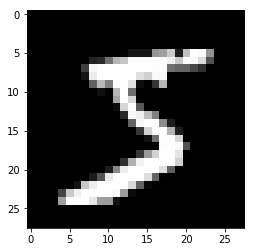

In [5]:
plt.imshow(x_train[0], cmap='Greys_r')

In [6]:

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


W0712 10:47:40.767258 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 10:47:40.771819 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 10:47:40.785383 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 10:47:40.834785 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 10:47:40.855290 139984231556992 deprecation_wrapp

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


W0712 10:47:45.492624 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 10:47:45.503673 139984231556992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

W0712 10:47:54.461676 139984231556992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/12
60000/60000 [==============================] - 55s 917us/step - loss: 0.4125 - acc: 0.8711
Epoch 2/12
60000/60000 [==============================] - 54s 906us/step - loss: 0.1473 - acc: 0.9562
Epoch 3/12
60000/60000 [==============================] - 54s 904us/step - loss: 0.1103 - acc: 0.9655
Epoch 4/12
60000/60000 [==============================] - 55s 910us/step - loss: 0.0934 - acc: 0.9716
Epoch 5/12
60000/60000 [==============================] - 55s 916us/step - loss: 0.0779 - acc: 0.9765
Epoch 6/12
60000/60000 [==============================] - 55s 912us/step - loss: 0.0730 - acc: 0.9775
Epoch 7/12
60000/60000 [==============================] - 55s 909us/step - loss: 0.0673 - acc: 0.9791
Epoch 8/12
60000/60000 [==============================] - 54s 902us/step - loss: 0.0618 - acc: 0.9803
Epoch 9/12
60000/60000 [==============================] - 54s 900us/step - loss: 0.0599 - acc: 0.9817
Epoch 10/12
60000/60000 [==============================] - 54s 902us/step - loss: 

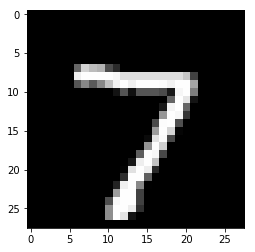

In [10]:
plt.imshow(test_images[0], cmap='Greys_r')

In [11]:
model.predict_classes(np.expand_dims(x_test[0],axis=0))

array([7])

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03233323479098035
Test accuracy: 0.9895
